In [2]:
import numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("/kaggle/input/list-of-moststreamed-songs-on-spotify/List of most-streamed songs on Spotify.csv")

In [9]:
df.info

<bound method DataFrame.info of     Rank                     Song Streams (Billions)  \
0      1             Shape of You              3,327   
1      2          Blinding Lights              3,323   
2      3             Dance Monkey              2,721   
3      4        Someone You Loved              2,588   
4      5                 Rockstar              2,570   
..   ...                      ...                ...   
95    96                I'm Yours              1,490   
96    97                Despacito              1,490   
97    98  Smells Like Teen Spirit              1,487   
98    99                    Sugar              1,480   
99   100                 Rockstar              1,478   

                               Artist       Release Date  
0                          Ed Sheeran     6 January 2017  
1                          The Weeknd   29 November 2019  
2                         Tones And I          10.May.19  
3                       Lewis Capaldi    8 November 2018  


In [10]:
df['Streams (Billions)']=df['Streams (Billions)'].str.replace(',','')
df['Streams (Billions)']=df['Streams (Billions)'].astype('int')

In [11]:
df['Release Date']=df['Release Date'].astype('datetime64[ns]')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rank                100 non-null    int64         
 1   Song                100 non-null    object        
 2   Streams (Billions)  100 non-null    int64         
 3   Artist              100 non-null    object        
 4   Release Date        100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 4.0+ KB


In [14]:
df.head()

,Rank,Song,Streams (Billions),Artist,Release Date
0,1,Shape of You,3327,Ed Sheeran,2017-01-06
1,2,Blinding Lights,3323,The Weeknd,2019-11-29
2,3,Dance Monkey,2721,Tones And I,2019-05-10
3,4,Someone You Loved,2588,Lewis Capaldi,2018-11-08
4,5,Rockstar,2570,Post Malone featuring 21 Savage,2017-09-15


In [16]:
art=df[['Artist','Streams (Billions)']].groupby('Artist').sum()
art=art.sort_values(by='Streams (Billions)',ascending=False)
art=art.head(5)

In [17]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:title={'center':'Top 5 artists by Streams count '}, xlabel='Artist'>

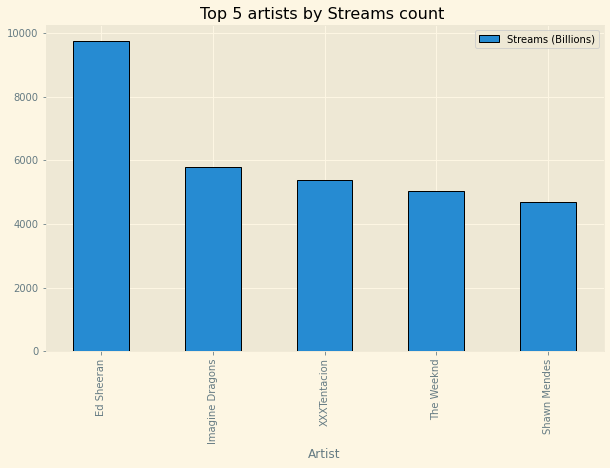

In [18]:
plt.style.use('Solarize_Light2')
art.plot(kind='bar',figsize=(10,6),title='Top 5 artists by Streams count ',edgecolor ='black')

In [19]:
sng=df[['Song','Streams (Billions)']]
sng=sng.sort_values(by='Streams (Billions)',ascending=False)
sng=sng.head(5)

<AxesSubplot:title={'center':'Top 5 Songs by Streams count '}, ylabel='Song'>

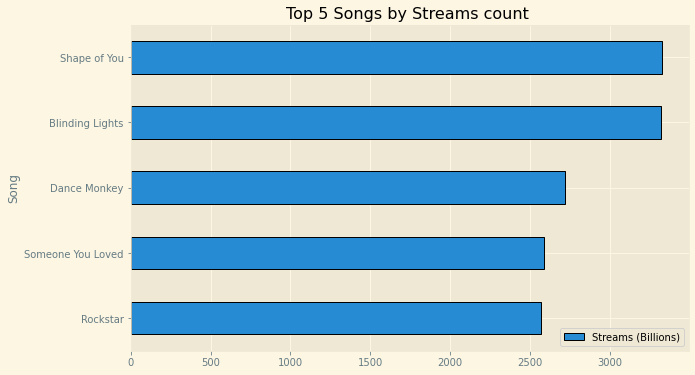

In [20]:
sng=pd.pivot_table(sng,index='Song',values='Streams (Billions)')
sng=sng.sort_values(by='Streams (Billions)',ascending=True)
sng.plot(kind='barh',figsize=(10,6),title='Top 5 Songs by Streams count ',edgecolor = 'black')

<AxesSubplot:title={'center':'Stream count Distribution'}, ylabel='Frequency'>

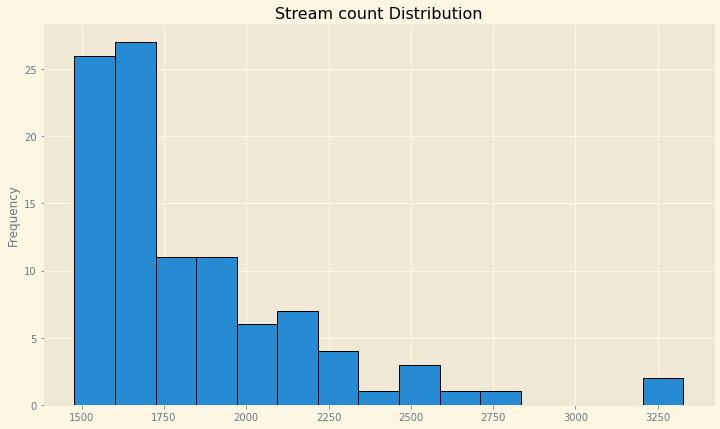

In [21]:
stream=df['Streams (Billions)']
stream.plot(kind='hist',figsize=(12,7),bins=15,edgecolor = 'black',title='Stream count Distribution')

In [24]:
df['year'] = pd.DatetimeIndex(df['Release Date']).year

In [25]:
year=df[['year','Song','Streams (Billions)']]
year=year.sort_values('Streams (Billions)').drop_duplicates('year',keep='last')
year.sort_values('year')

,year,Song,Streams (Billions)
23,1975,Bohemian Rhapsody,2006
97,1991,Smells Like Teen Spirit,1487
84,1995,Wonderwall,1542
73,2002,Lose Yourself,1605
71,2004,Mr. Brightside,1613
95,2008,I'm Yours,1490
50,2011,Can't Hold Us,1702
31,2012,Sweater Weather,1899
29,2013,Take Me to Church,1916
15,2014,Thinking Out Loud,2131


<AxesSubplot:title={'center':'Average streaming count over the years'}, xlabel='year'>

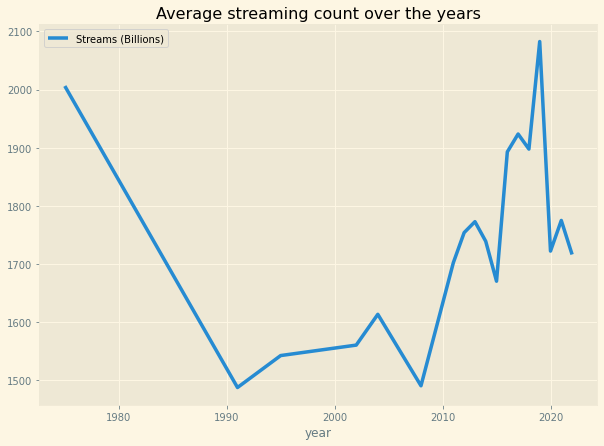

In [26]:
year=pd.pivot_table(df,index=['year'],values='Streams (Billions)',aggfunc="mean")
year.plot(kind='line',linewidth=3.5,figsize=(10,7),title='Average streaming count over the years')

<AxesSubplot:>

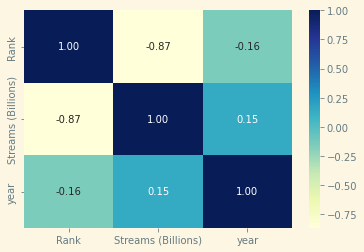

In [27]:
plt.style.use('Solarize_Light2')
sns.heatmap(df.corr(),annot = True, cmap= 'YlGnBu', fmt= '.2f')

array([<AxesSubplot:title={'center':'Song'}, xlabel='Artist'>],
      dtype=object)

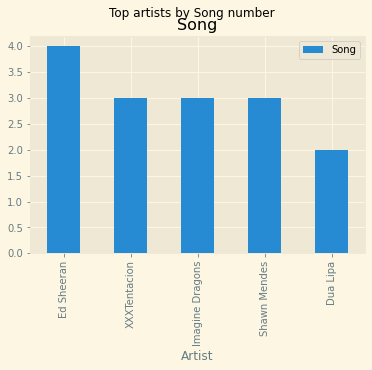

In [28]:
art1=df[['Artist','Song']].groupby('Artist').count()
art1=art1.sort_values('Song',ascending=False)
art1=art1.head()
art1.plot(kind='bar',subplots=True,title='Top artists by Song number')

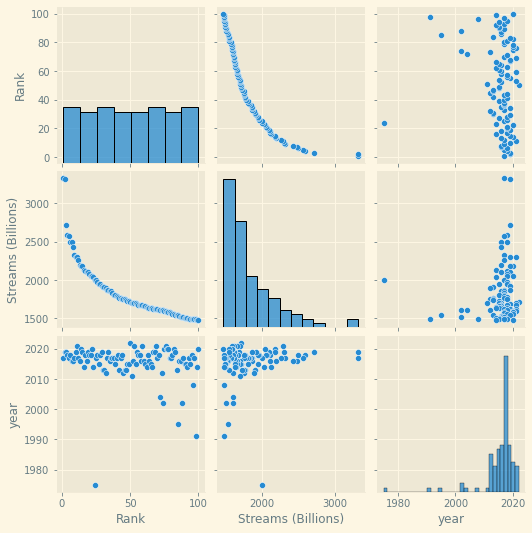

In [29]:
sns.pairplot(df)